# Assignment 5

## Assignment 5.1

In [2]:
import keras
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results


In [5]:
#vectorize training data
x_train = vectorize_sequences(train_data)
# vectorizing test data
x_test = vectorize_sequences(test_data)

In [6]:
# vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
# building the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# optimizer
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [11]:
# creating validation sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
# training model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5258 - binary_accuracy: 0.7702 - val_loss: 0.3911 - val_binary_accuracy: 0.8638
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3123 - binary_accuracy: 0.9043 - val_loss: 0.3197 - val_binary_accuracy: 0.8798
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2306 - binary_accuracy: 0.9259 - val_loss: 0.2861 - val_binary_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1806 - binary_accuracy: 0.9422 - val_loss: 0.2794 - val_binary_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1454 - binary_accuracy: 0.9540 - val_loss: 0.2899 - val_binary_accuracy: 0.8829
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1213 - binary_accuracy: 0.9626 - val_loss: 0.2916 - val_binary_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - los

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

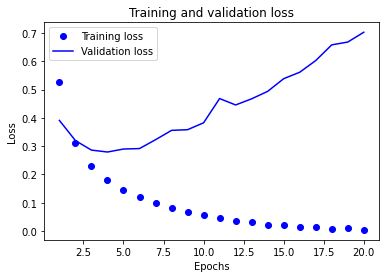

In [14]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

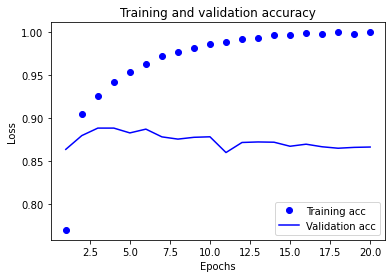

In [15]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.4894 - accuracy: 0.8169
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2783 - accuracy: 0.9067
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2106 - accuracy: 0.9262
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3124 - accuracy: 0.8743


In [17]:
results

[0.3123614192008972, 0.8743199706077576]

In [18]:
# predicting
model.predict(x_test)

782/782 [==============================] - 1s 957us/step


array([[0.13855545],
       [0.9998267 ],
       [0.70297915],
       ...,
       [0.07205915],
       [0.04570374],
       [0.45670623]], dtype=float32)

## Assignment 5.2

In [19]:
from keras.datasets import reuters

In [20]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [21]:
len(train_data)

8982

In [22]:
len(test_data)

2246

In [23]:
# vectorize training/test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [25]:
# one hot labels
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [27]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# creating validation sets
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.7426 - accuracy: 0.5064 - val_loss: 1.8622 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 0s 32ms/step - loss: 1.5241 - accuracy: 0.6837 - val_loss: 1.3689 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 0s 31ms/step - loss: 1.1294 - accuracy: 0.7616 - val_loss: 1.1732 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 27ms/step - loss: 0.9003 - accuracy: 0.8084 - val_loss: 1.0662 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 29ms/step - loss: 0.7251 - accuracy: 0.8462 - val_loss: 0.9952 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 34ms/step - loss: 0.5883 - accuracy: 0.8796 - val_loss: 0.9632 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 0s 31ms/step - loss: 0.4812 - accuracy: 0.9015 - val_loss: 0.9591 - val_accuracy: 0.7930
Epoch 8/20
16

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

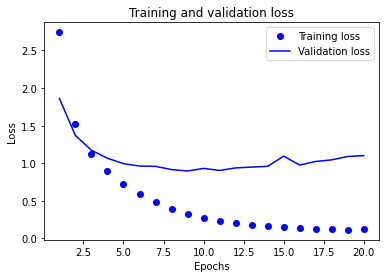

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

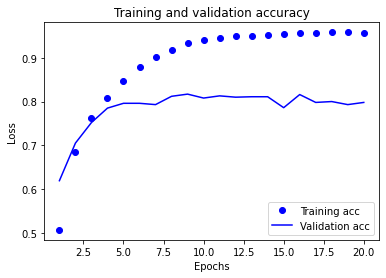

In [32]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [33]:
# doing 8 epochs to avoid overfitting
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 35ms/step - loss: 2.4566 - accuracy: 0.5382 - val_loss: 1.6569 - val_accuracy: 0.6500
Epoch 2/8
16/16 [==============================] - 0s 30ms/step - loss: 1.3560 - accuracy: 0.7111 - val_loss: 1.2760 - val_accuracy: 0.7200
Epoch 3/8
16/16 [==============================] - 0s 31ms/step - loss: 1.0257 - accuracy: 0.7836 - val_loss: 1.1037 - val_accuracy: 0.7700
Epoch 4/8
16/16 [==============================] - 0s 30ms/step - loss: 0.8121 - accuracy: 0.8316 - val_loss: 1.0251 - val_accuracy: 0.7790
Epoch 5/8
16/16 [==============================] - 0s 27ms/step - loss: 0.6527 - accuracy: 0.8644 - val_loss: 0.9755 - val_accuracy: 0.7900
Epoch 6/8
16/16 [==============================] - 0s 27ms/step - loss: 0.5279 - accuracy: 0.8891 - val_loss: 0.9329 - val_accuracy: 0.8100
Epoch 7/8
16/16 [==============================] - 0s 30ms/step - loss: 0.4282 - accuracy: 0.9117 - val_loss: 0.9042 - val_accuracy: 0.8080
Epoch 8/8
71/71 [===

In [34]:
results

[0.9900475144386292, 0.7876224517822266]

## Assignment 5.3

In [35]:
from keras.datasets import boston_housing
from keras import backend as K

In [36]:
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [37]:
# normalizing data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [38]:
def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [39]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [40]:
all_scores

[2.0710208415985107,
 2.7665224075317383,
 2.5608677864074707,
 2.4823288917541504]

In [41]:
np.mean(all_scores)

2.4701849818229675

In [42]:
# memory clean up
K.clear_session()

In [43]:
# same as before just way more epochs
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [44]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [45]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

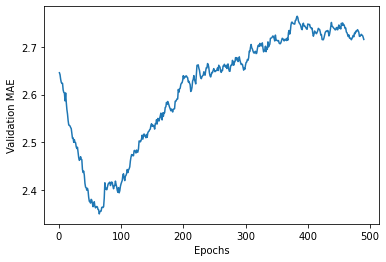

In [46]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [47]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 20.1138 - mae: 2.8511


In [48]:
test_mae_score

2.8511362075805664